<a href="https://colab.research.google.com/github/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/blob/master/deeplearning/Keras_Celsius_to_Fahrenheit_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando um modelo simples usando Keras

O problema é converter de Graus  Celsius para Fahrenheit,  a  fórmula é:

$$ f = c \times 1.8 + 32 $$


No nosso caso, vamos informar valores em Celsius  (0, 8, 15, 22, 38) and seus correspondenets em Fahrenheit (32, 46, 59, 72, 100).

Então, vamos treinar o modelo para "APRENDER" A fórmula acima.

![alt text](https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/temperatures.png)

## Importando dependências e bibliotecas


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

##  dados de treino

temperaturas em Graus Celsius e Graus Fahrenheit

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} Graus Celsius = {} Graus Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 Graus Celsius = -40.0 Graus Fahrenheit
-10.0 Graus Celsius = 14.0 Graus Fahrenheit
0.0 Graus Celsius = 32.0 Graus Fahrenheit
8.0 Graus Celsius = 46.0 Graus Fahrenheit
15.0 Graus Celsius = 59.0 Graus Fahrenheit
22.0 Graus Celsius = 72.0 Graus Fahrenheit
38.0 Graus Celsius = 100.0 Graus Fahrenheit


## Criando o modelo 


### Construindo camadas


Parâmetros de configuração:


*   `input_shape=[1]` — O shape dos dados de entrada. No nosso exemplo, o tamanho é igual a 1 (Uma temperatura em Graus Celsius)


*   `units=1` — O Número de neurônios da camada. (Colocamos somente 1 neurônio, mas, dependendo do problema, podemos variar 10, 100, 1000 neurônioas, etc)



In [4]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

### Construindo Layers (camadas) no modelo


Este modelo tem somente uma camada ou  layer (layer0)

In [5]:
model = tf.keras.Sequential([layer0])

## Compilar o modelo, com o loss (função de peda) and função de otimização
:

- **Loss function** — Função de perda - Forma de medir o quanto as previsões estão próximas dos resultados ( y  e ypred).  Essa diferença é chamada de perda, função de custo ou "loss"

- **Optimizer function** — A forma de adjustar o pesos internos com o objetivo de reduzir a perda



In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))



A função de perda -  loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) e o otimizador  ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) foram usados neste modelo. 

Precisamento definir no Otimizador, a taxa de aprendizado (learning rate), valor 0.1 acima.
Se a taxa de aprendizagem é muito pequena, o modelo precisará de muitas iterações para treinar o modelo. Se for muito grande, poderá ter uma acurácia menor.
Um bom valor de learning rate necessita de tentativa e erro, mas é muito comum um valor entre 0.001 (default) e 0.1.


## Treinando o modelo

Train the model by calling the `fit` method. 

No treinamento do modelo, são encontrando os pesos (weights).
Inicialmente os pesos são inicializados randomicamente. A diferença entre a saída atual (y_previsto) e a saída desejada (y) é calculada usando a função de perda (loss function), e o otimizador acha quais os pesos ideais.

Este ciclo de calcular, comparar e ajustar os pesos é controlado pelo método `fit`.

As épocas (`epochs`) es.pecifica quantas vezes vamos integir como todo o conjunto de dados de entrada (X).


In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [ ]:
#history.history['loss']

## Display training statistics

O métido  `fit` retorna um objeto 'history' que contem o erro (loss) de cada época de treinamento.





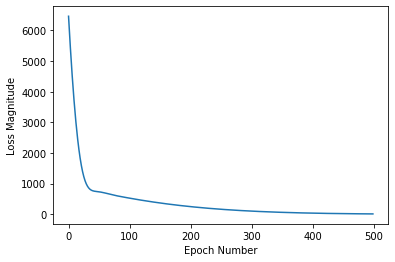

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usando o modelo prever novos valores


In [8]:
print(model.predict([100.0])[0][0])

211.30986


A resposta correta é $100 \times 1.8 + 32 = 212$, e nosso modelo preveu o valor de 211.7474 (erro de 0.2526, muito próximo)


## a Matriz de pesos (layer weights)


In [9]:
print("Matriz de pesos: {}".format(layer0.get_weights()))

Matriz de pesos: [array([[1.8243408]], dtype=float32), array([28.875776], dtype=float32)]


A primeira variável está próxima a  ~1.8 e a segunda a  ~32. Esses valores (1.8 and 32) são os valores reais da fórmula de conversão.

Fórmula $y = mx + b$, onde, $f = 1.8c + 32$.
Fórmula aprendida $f = 1.820181c + 29.3202$.


### Melhorando a previsão

Vamos colocar mais camadas, para tentar melhorar a precisão.

In [10]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=10)   
l2 = tf.keras.layers.Dense(units=1) 
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=600, verbose=False)
print("Treinamento concluído")
print('Temperatura Prevista:',model.predict([100.0])[0][0])
print()
print()
print("pesos da camada l0: {}".format(l0.get_weights()))
print("pesos da camada l1: {}".format(l1.get_weights()))
print("pesos da camada l2: {}".format(l2.get_weights()))

Treinamento concluído
Temperatura Prevista: 211.74745


pesos da camada l0: [array([[-0.5861853 , -0.21256717, -0.17139475, -0.3116893 ]],
      dtype=float32), array([-2.9491332, -1.2357405, -2.6428688, -2.8782976], dtype=float32)]
pesos da camada l1: [array([[ 0.01035738, -0.70095974,  0.4773669 , -0.7911477 , -0.16266397,
        -0.06108572, -0.16794494,  0.04849367,  0.06312281, -0.3459729 ],
       [-0.5324648 , -0.2000327 , -0.35457993, -0.34840247, -0.03788486,
         0.01242613,  0.0759638 ,  0.1388766 , -0.05576927,  0.1913226 ],
       [-0.29446635,  0.08213317, -0.10632511, -0.329974  , -0.570219  ,
        -0.6936071 , -0.6137196 ,  0.21637693,  0.457239  , -0.1975312 ],
       [ 0.20844427, -0.3462187 , -0.2108841 , -0.6138668 , -0.5508317 ,
         0.22877054, -0.24221149,  0.11067473, -0.18888864,  0.63265526]],
      dtype=float32), array([ 0.17982233,  2.9007921 ,  2.5567343 ,  2.9007487 ,  2.863331  ,
        2.0997658 ,  2.8537807 , -2.278997  , -2.5552776 ,  0.0